<a href="https://colab.research.google.com/github/vinigm/Estudos/blob/main/S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Séries Temporais**
---

**Tópicos**
1. Introdução
2. Wrangling
3. Decomposição

**MOTIVAÇÃO**

Neste módulo, vamos analisar dados sobre o consumo de energia elétrica residencial, comercial e industrial, em mega watts (MWh), da região sudeste do Brasil, entre os anos de 2004 e 2020. O conjunto de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv) e foi inspirado no conjunto de dados da Empresa de Pesquisa Energética (EPE), estatal do governo vinculada ao ministério de minas e energia, presente neste [link](https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica). 

In [6]:
import pandas as pd
import seaborn as sns

In [1]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [7]:
data = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [9]:
data.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


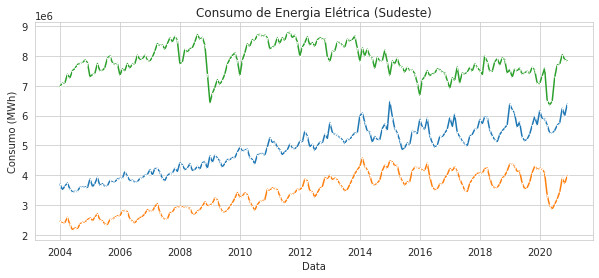

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

Uma **série temporal** é um conjunto de dados composto pela coleta de amostras de uma ou mais variáveis em intervalos **fixos** de tempo (granularidade). É muito utilizada para análise do mercado de renda variável, dados econômicos, consumo de energia elétrica, etc.

**WRANGLING**

Indexação:

In [12]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [13]:
data = data.set_index(keys=['referencia'])

In [14]:
data.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


**SLICING**

Selecionar um intervalo de tempo de uma série temporal. Permite focar a análise de intervalos de tempo de interesse.

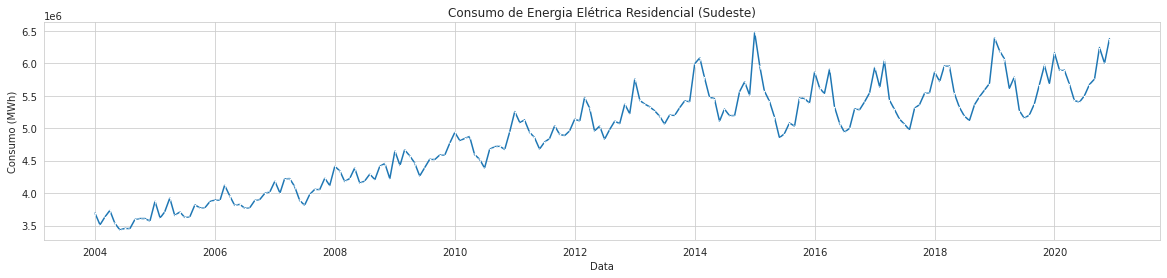

In [17]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(20, 4)

In [19]:
data['2019'].head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


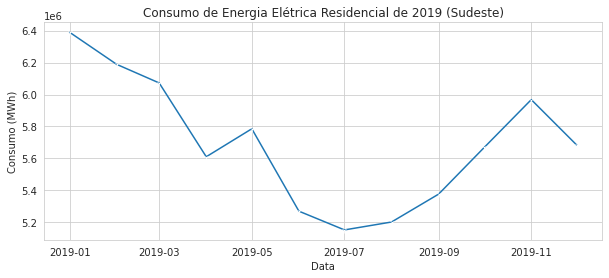

In [20]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2019'], x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial de 2019 (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

Slicing por meses

In [21]:
data['2019-01':'2019-06'].head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


Slicing por dias

In [22]:
data['2019-01-15':'2019-02-15'].head()

,residencial,industrial,comercial
referencia,,,
2019-02-01,6188834,7285407,4365504


**RESAMPLING**

Aumentar/diminuir a granularidade de uma série temporal, como ir de segundos para horas ou de dias para meses

Exemplo: resampling por trimestre

In [24]:
resampled = data.resample(rule='3m').mean()

In [25]:
resampled.head()

,residencial,industrial,comercial
referencia,,,
2004-01-31,3.694386e+06,6.977471e+06,2.450453e+06
2004-04-30,3.624953e+06,7.185592e+06,2.460133e+06
2004-07-31,3.476112e+06,7.446800e+06,2.245696e+06
2004-10-31,3.552537e+06,7.740310e+06,2.322258e+06
2005-01-31,3.683949e+06,7.648244e+06,2.495533e+06


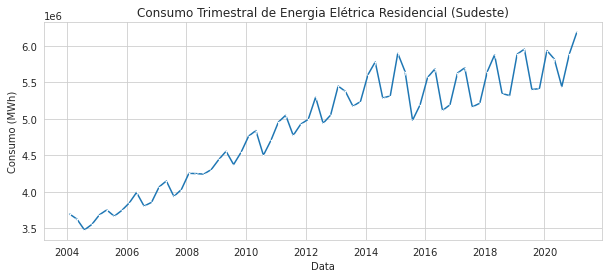

In [26]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=resampled, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo Trimestral de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

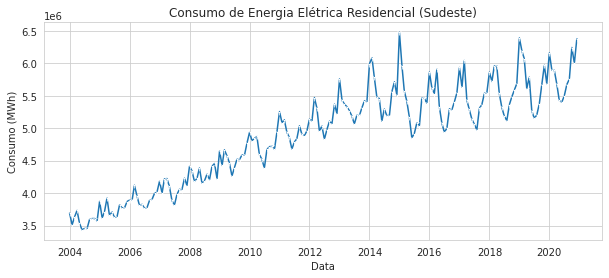

In [27]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

**VISUALIZAÇÃO**

In [28]:
data['month'] = data.index.month
data['year'] = data.index.year

In [29]:
data.head()

,residencial,industrial,comercial,month,year
referencia,,,,,
2004-01-01,3694386,6977471,2450453,1,2004
2004-02-01,3511541,7084623,2396965,2,2004
2004-03-01,3629455,7087613,2402521,3,2004
2004-04-01,3733863,7384540,2580914,4,2004
2004-05-01,3537269,7258307,2344084,5,2004


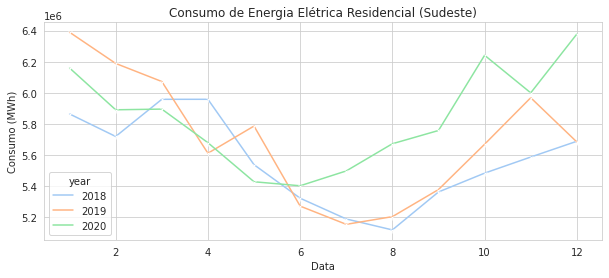

In [32]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data['2018':'2020'], x='month', y='residencial', hue='year', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

**COMPONENTES**

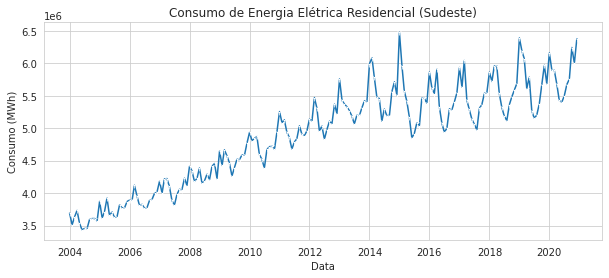

In [33]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")  
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [34]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vamos utilizar o método `seasonal_decompose` do pacote statsmodel para decomport uma série temporal em suas componentes.

In [35]:
decomposicao = sm.tsa.seasonal_decompose(data[['residencial']], model='additive')

In [36]:
residuo = decomposicao.resid
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal

In [37]:
sazonalidade.head()

,residencial
referencia,
2004-01-01,397799.669054
2004-02-01,199532.997179
2004-03-01,237189.830512
2004-04-01,116027.244575
2004-05-01,-67565.791884


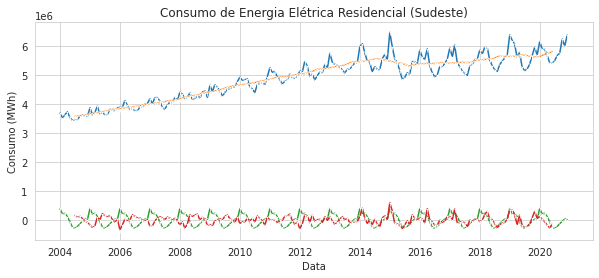

In [38]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=tendencia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=sazonalidade, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=residuo, x='referencia', y='residencial', marker="1", palette="pastel")
  
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

**TENDENCIA**

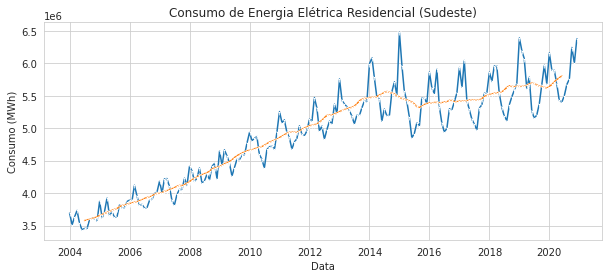

In [39]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=tendencia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

**SAZONALIDADE**

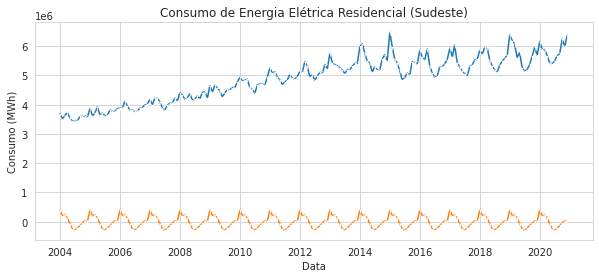

In [40]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=sazonalidade, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

**RESIDUOS**

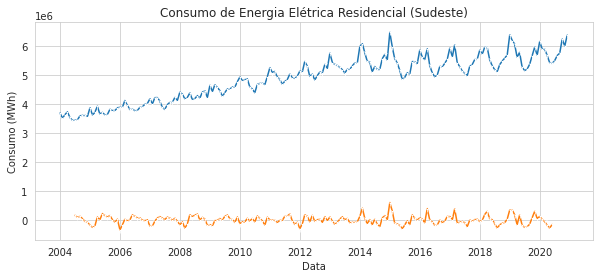

In [41]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=residuo, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)